In [0]:
import tensorflow as tf

In [0]:
import warnings
warnings.filterwarnings("ignore")

In [0]:
print(tf.__version__)

1.15.0


In [0]:
graph1 = tf.Graph()
type(graph1)

tensorflow.python.framework.ops.Graph

In [0]:
with graph1.as_default():
  a = tf.constant([3])
  b = tf.constant([4])

type(a),type(b)

(tensorflow.python.framework.ops.Tensor,
 tensorflow.python.framework.ops.Tensor)

In [0]:
with tf.Session(graph=graph1) as sess:
  a = sess.run(a)
  b = sess.run(b)
  c = tf.add(a,b)
  result = sess.run(c)
  print(f'a = {a} + b = {b} = result = {result}')
  

a = [3] + b = [4] = result = [7]


In [0]:
graph2 = tf.Graph()
with graph2.as_default():
    scalar = tf.constant(3)
    vector = tf.constant([3,4,3])
    matrix = tf.constant([[2,4,7],[4,6,9],[5,1,0]])
    tensor = tf.constant([  [[3,1,3],[1,2,3],[9,4,3]], [[1,2,1],[3,1,1],[9,5,4]], [[4,1,9],[6,3,6],[7,7,8]] ])

t_list = [scalar,vector,matrix,tensor]
with tf.Session(graph = graph2) as sess:
    for i in t_list:
      result = sess.run(i)
      print(f' {result} and shape = {i.shape}\n')

 3 and shape = ()

 [3 4 3] and shape = (3,)

 [[2 4 7]
 [4 6 9]
 [5 1 0]] and shape = (3, 3)

 [[[3 1 3]
  [1 2 3]
  [9 4 3]]

 [[1 2 1]
  [3 1 1]
  [9 5 4]]

 [[4 1 9]
  [6 3 6]
  [7 7 8]]] and shape = (3, 3, 3)



In [0]:
graph3 = tf.Graph()
with graph3.as_default():
  matrix_1 = tf.constant([[2,3,4],[1,3,4],[4,5,7]])
  matrix_2 = tf.constant([[9,4,2],[1,5,2],[9,0,4]])

  addition_1 = tf.add(matrix_1,matrix_2)
  addition_2 = matrix_1 + matrix_2

with tf.Session(graph = graph3) as sess:
  print(f' first inputs are : {sess.run(matrix_1)}')
  print(f' second inputs are : {sess.run(matrix_2)}')
  print(f' tf addition : ({sess.run(addition_1)})')
  print(f' normal addition : {sess.run(addition_2)}')

 first inputs are : [[2 3 4]
 [1 3 4]
 [4 5 7]]
 second inputs are : [[9 4 2]
 [1 5 2]
 [9 0 4]]
 tf addition : ([[11  7  6]
 [ 2  8  6]
 [13  5 11]])
 normal addition : [[11  7  6]
 [ 2  8  6]
 [13  5 11]]


In [0]:
graph4 = tf.Graph()
with graph4.as_default():
  matrix_1 = tf.constant([[2,3,4],[1,3,4]])
  matrix_2 = tf.constant([[9,4],[1,5],[9,0]])
  matrix_mul = tf.matmul(matrix_1,matrix_2)

with tf.Session(graph= graph4) as sess:
  sess.run(matrix_1)
  sess.run(matrix_2)
  print(f' Matrix Multiplication using tf.matmul : \n result = {sess.run(matrix_mul)}')

 Matrix Multiplication using tf.matmul : 
 result = [[57 23]
 [48 19]]


# Variables



In [0]:
# define variable
v = tf.Variable(0)

In [0]:
# assign value to the variable
update = tf.assign(v,v+1)

In [0]:
# add initialization variable to the graph
init_op = tf.global_variables_initializer()

In [0]:
with tf.Session() as sess:
  sess.run(init_op)
  print(f'initial value of the variable {sess.run(v)} \n')
  for i in range(3):
    sess.run(update)
    print(f'Updated value after {i}th iteration : {sess.run(v)}')

initial value of the variable 0 

Updated value after 0th iteration : 1
Updated value after 1th iteration : 2
Updated value after 2th iteration : 3


# Placeholders


In [38]:
a = tf.placeholder(tf.float32)
a

<tf.Tensor 'Placeholder_2:0' shape=<unknown> dtype=float32>

In [39]:
b = a * 2
b

<tf.Tensor 'mul_1:0' shape=<unknown> dtype=float32>

In [40]:
with tf.Session() as sess:
  result = sess.run(b,feed_dict={a:3.5})
  print(f' result : {c}')


 result : 7.0


In [44]:
dictionary = {a : [[[5,4,1],
                    [1,0,9],
                    [7,3,1]],
                    [[3,1,4],
                    [6,1,9],
                    [1,8,7]
                    ]]}
with tf.Session() as sess:
  result = sess.run(b,feed_dict = dictionary)
  print(f' result : {result}')

 result : [[[10.  8.  2.]
  [ 2.  0. 18.]
  [14.  6.  2.]]

 [[ 6.  2.  8.]
  [12.  2. 18.]
  [ 2. 16. 14.]]]


# Operations

In [50]:
graph5 = tf.Graph()

with graph5.as_default():
  i = tf.constant([9])
  j = tf.constant([5])
  k = tf.add(i,j)
  l = tf.subtract(i,j)

with tf.Session(graph= graph5) as sess:
  sess.run(i)
  sess.run(j)

  print(f'addition : {sess.run(k)}\nsubstraction : {sess.run(l)}')

addition : [14]
substraction : [4]


# Linear Regression

Equation of simple linear model : Y = aX + b

In [0]:
# import required packeges
import numpy as np
import pandas as pd
import pylab as pl
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

In [54]:
X = np.arange(0.0,18.0,0.5)
X

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
       11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ,
       16.5, 17. , 17.5])

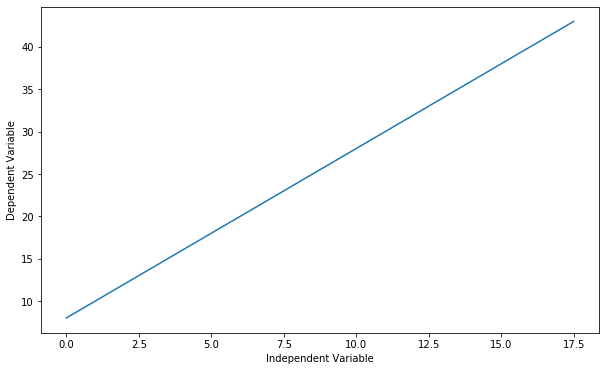

In [60]:
a = 2 # slope change and try
b = 8
Y = a * X + b
plt.plot(X,Y)
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

# Linear Regression with TensorFlow

In [68]:
# Fetch a single <1MB file using the raw GitHub URL.
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://raw.githubusercontent.com/nikhil490/First-Step/master/FuelConsumptionCo2.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 72629  100 72629    0     0   400k      0 --:--:-- --:--:-- --:--:--  400k


In [0]:
df = pd.read_csv('FuelConsumptionCo2.csv')

In [71]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [73]:
train_x = np.asanyarray(df[['ENGINESIZE']])
train_x[:5]

array([[2. ],
       [2.4],
       [1.5],
       [3.5],
       [3.5]])

In [76]:
train_y = np.asanyarray(df[['CO2EMISSIONS']])
train_y[:5]

array([[196],
       [221],
       [136],
       [255],
       [244]])

In [75]:
a = tf.Variable(20.0)
b = tf.Variable(30.2)
y = a*train_x + b
a,b,y

(<tf.Variable 'Variable_1:0' shape=() dtype=float32_ref>,
 <tf.Variable 'Variable_2:0' shape=() dtype=float32_ref>,
 <tf.Tensor 'add_2:0' shape=(1067, 1) dtype=float32>)

In [0]:
loss = tf.reduce_mean(tf.square(y - train_y))

In [0]:
optimizer = tf.train.GradientDescentOptimizer(0.05)
train = optimizer.minimize(loss)

In [0]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [82]:
loss_values =  []
train_values = []
for epoch in range(100):
  _,loss_val,a_val,b_val = sess.run([train,loss,a,b])
  loss_values.append(loss_val)
  if epoch%5 == 0:
    print(epoch,loss_val,a_val,b_val)
    train_values.append([a_val,b_val])


0 26992.59 77.07106 46.11027
5 1891.721 58.844627 47.595726
10 1762.7241 57.65104 53.01983
15 1653.5896 56.366524 58.023914
20 1559.0441 55.17285 62.682034
25 1477.1372 54.061794 67.01764
30 1406.179 53.027668 71.05308
35 1344.706 52.065136 74.80913
40 1291.4507 51.169243 78.30512
45 1245.3146 50.335384 81.559074
50 1205.3452 49.55925 84.587746
55 1170.7192 48.83685 87.40672
60 1140.7214 48.16447 90.03054
65 1114.734 47.53864 92.472694
70 1092.2205 46.956135 94.74576
75 1072.716 46.413963 96.86146
80 1055.8191 45.90933 98.83067
85 1041.1809 45.43963 100.66356
90 1028.4996 45.002457 102.36954
95 1017.5135 44.595547 103.9574


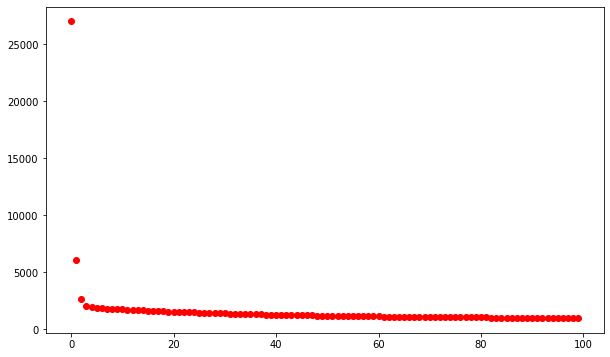

In [83]:
plt.plot(loss_values,'ro')

# Logistic Regression in Tensorflow

In [0]:
import time
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [0]:
iris = load_iris()
iris_X, iris_y = iris.data[:-1,:], iris.target[:-1]
iris_y= pd.get_dummies(iris_y).values
trainX, testX, trainY, testY = train_test_split(iris_X, iris_y, test_size=0.33, random_state=42)


In [0]:
# numFeatures is the number of features in our input data.
# In the iris dataset, this number is '4'.
numFeatures = trainX.shape[1]

# numLabels is the number of classes our data points can be in.
# In the iris dataset, this number is '3'.
numLabels = trainY.shape[1]


# Placeholders
# 'None' means TensorFlow shouldn't expect a fixed number in that dimension
X = tf.placeholder(tf.float32, [None, numFeatures]) # Iris has 4 features, so X is a tensor to hold our data.
yGold = tf.placeholder(tf.float32, [None, numLabels]) # This will be our correct answers matrix for 3 classes.

In [0]:
W = tf.Variable(tf.zeros([4, 3]))  # 4-dimensional input and  3 classes
b = tf.Variable(tf.zeros([3])) # 3-dimensional output [0,0,1],[0,1,0],[1,0,0]

In [0]:
#Randomly sample from a normal distribution with standard deviation .01

weights = tf.Variable(tf.random_normal([numFeatures,numLabels],
                                       mean=0,
                                       stddev=0.01,
                                       name="weights"))

bias = tf.Variable(tf.random_normal([1,numLabels],
                                    mean=0,
                                    stddev=0.01,
                                    name="bias"))

# Logistic Regression model

3 main components:



1.   weight times features matrix multiplication operation
2.   summation of weighted features and a bias term

3.   sigmoid function



In [0]:
# Note that these feed into each other.
apply_weights_OP = tf.matmul(X, weights, name="apply_weights")
add_bias_OP = tf.add(apply_weights_OP, bias, name="add_bias") 
activation_OP = tf.nn.sigmoid(add_bias_OP, name="activation")

In [0]:
# Number of Epochs in our training
numEpochs = 700

# Defining our learning rate iterations (decay)
learningRate = tf.train.exponential_decay(learning_rate=0.0008,
                                          global_step= 1,
                                          decay_steps=trainX.shape[0],
                                          decay_rate= 0.95,
                                          staircase=True)

In [0]:
#Defining our cost function - Squared Mean Error
cost_OP = tf.nn.l2_loss(activation_OP-yGold, name="squared_error_cost")

#Defining our Gradient Descent
training_OP = tf.train.GradientDescentOptimizer(learningRate).minimize(cost_OP)

In [0]:
# Create a tensorflow session
sess = tf.Session()

# Initialize our weights and biases variables.
init_OP = tf.global_variables_initializer()

# Initialize all tensorflow variables
sess.run(init_OP)

In [0]:
# argmax(activation_OP, 1) returns the label with the most probability
# argmax(yGold, 1) is the correct label
correct_predictions_OP = tf.equal(tf.argmax(activation_OP,1),tf.argmax(yGold,1))

# If every false prediction is 0 and every true prediction is 1, the average returns us the accuracy
accuracy_OP = tf.reduce_mean(tf.cast(correct_predictions_OP, "float"))

# Summary op for regression output
activation_summary_OP = tf.summary.histogram("output", activation_OP)

# Summary op for accuracy
accuracy_summary_OP = tf.summary.scalar("accuracy", accuracy_OP)

# Summary op for cost
cost_summary_OP = tf.summary.scalar("cost", cost_OP)

# Summary ops to check how variables (W, b) are updating after each iteration
weightSummary = tf.summary.histogram("weights", weights.eval(session=sess))
biasSummary = tf.summary.histogram("biases", bias.eval(session=sess))

# Merge all summaries
merged = tf.summary.merge([activation_summary_OP, accuracy_summary_OP, cost_summary_OP, weightSummary, biasSummary])

# Summary writer
writer = tf.summary.FileWriter("summary_logs", sess.graph)

In [94]:
cost = 0
diff = 1
epoch_values = []
accuracy_values = []
cost_values = []

# Training epochs
for i in range(numEpochs):
    if i > 1 and diff < .0001:
        print("change in cost %g; convergence."%diff)
        break
    else:
        # Run training step
        step = sess.run(training_OP, feed_dict={X: trainX, yGold: trainY})
        # Report occasional stats
        if i % 10 == 0:
            # Add epoch to epoch_values
            epoch_values.append(i)
            # Generate accuracy stats on test data
            train_accuracy, newCost = sess.run([accuracy_OP, cost_OP], feed_dict={X: trainX, yGold: trainY})
            # Add accuracy to live graphing variable
            accuracy_values.append(train_accuracy)
            # Add cost to live graphing variable
            cost_values.append(newCost)
            # Re-assign values for variables
            diff = abs(newCost - cost)
            cost = newCost

            #generate print statements
            print("step %d, training accuracy %g, cost %g, change in cost %g"%(i, train_accuracy, newCost, diff))


# How well do we perform on held-out test data?
print("final accuracy on test set: %s" %str(sess.run(accuracy_OP, 
                                                     feed_dict={X: testX, 
                                                                yGold: testY})))

step 0, training accuracy 0.333333, cost 34.8866, change in cost 34.8866
step 10, training accuracy 0.545455, cost 30.1569, change in cost 4.72972
step 20, training accuracy 0.646465, cost 28.2053, change in cost 1.95163
step 30, training accuracy 0.646465, cost 26.5546, change in cost 1.65067
step 40, training accuracy 0.646465, cost 25.1813, change in cost 1.3733
step 50, training accuracy 0.646465, cost 24.0462, change in cost 1.13509
step 60, training accuracy 0.646465, cost 23.1067, change in cost 0.939518
step 70, training accuracy 0.646465, cost 22.3242, change in cost 0.782467
step 80, training accuracy 0.646465, cost 21.6669, change in cost 0.65736
step 90, training accuracy 0.646465, cost 21.1092, change in cost 0.557716
step 100, training accuracy 0.656566, cost 20.6312, change in cost 0.477989
step 110, training accuracy 0.666667, cost 20.2174, change in cost 0.41374
step 120, training accuracy 0.666667, cost 19.8559, change in cost 0.361551
step 130, training accuracy 0.66

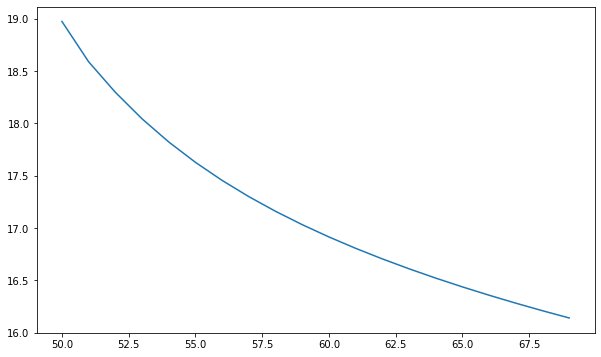

In [95]:
plt.plot([np.mean(cost_values[i-50:i]) for i in range(len(cost_values))])
plt.show()